In [ ]:
import os, csv

f=open("D:/vscode/train1.csv",'r+')
w=csv.writer(f)

for path, dirs, files in os.walk("D:/vscode/train/"):
    for filename in files:
        w.writerow([filename])


In [1]:
import numpy as np
import pandas as pd


dataa = pd.read_csv("D:/vscode/train1.csv")
dataa.head()

,fname,label
0,bomb-drop-impact-2804_10.wav,bomb-drop-impact
1,bomb-drop-impact-2804_11.wav,bomb-drop-impact
2,bomb-drop-impact-2804_110.wav,bomb-drop-impact
3,bomb-drop-impact-2804_111.wav,bomb-drop-impact
4,bomb-drop-impact-2804_12.wav,bomb-drop-impact


In [2]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fname   78 non-null     object
 1   label   78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [3]:
dataa.describe()


,fname,label
count,78,78
unique,78,7
top,bomb-drop-impact-2804_10.wav,boxer-getting-hit
freq,1,16


<AxesSubplot:xlabel='fname', ylabel='count'>

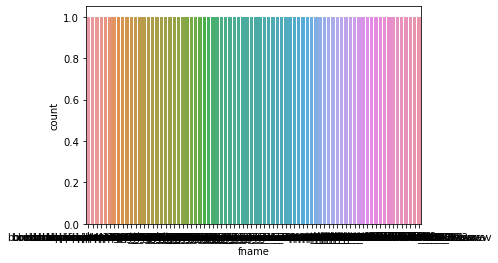

In [4]:
import seaborn as sns
sns.countplot(x='fname',data=dataa)

<AxesSubplot:xlabel='label', ylabel='count'>

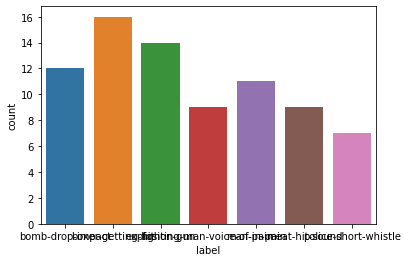

In [6]:
import seaborn as sns
sns.countplot(x='label',data=dataa)

FEATURE EXTRACTION


In [7]:
import numpy as np
import pandas as pd

import os
import librosa

import scipy
from scipy.stats import skew
from tqdm import tqdm, tqdm_pandas

tqdm.pandas()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC

In [8]:
# Load data

audio_train_files = os.listdir('D:/vscode/train/')
#audio_test_files = os.listdir('/content/drive/MyDrive/Thesis dataset/test/')

train = pd.read_csv('D:/vscode/train1.csv')


In [9]:
# Function from EDA kernel: https://www.kaggle.com/codename007/a-very-extensive-freesound-exploratory-analysis
SAMPLE_RATE = 44100

def clean_filename(fname, string):   
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':        
        file_name = string + file_name
    return file_name

# Generate mfcc features with mean and standard deviation
def get_mfcc(name, path):
    data, _ = librosa.core.load(path + name, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        ft1 = librosa.feature.mfcc(data, sr = SAMPLE_RATE, n_mfcc=40)
        ft2 = librosa.feature.zero_crossing_rate(data)[0]
        ft3 = librosa.feature.spectral_rolloff(data)[0]
        ft4 = librosa.feature.spectral_centroid(data)[0]
        ft5 = librosa.feature.spectral_contrast(data)[0]
        ft6 = librosa.feature.spectral_bandwidth(data)[0]
        ft1_trunc = np.hstack((np.mean(ft1, axis=1), np.std(ft1, axis=1), skew(ft1, axis = 1), np.max(ft1, axis = 1), np.median(ft1, axis = 1), np.min(ft1, axis = 1)))
        ft2_trunc = np.hstack((np.mean(ft2), np.std(ft2), skew(ft2), np.max(ft2), np.median(ft2), np.min(ft2)))
        ft3_trunc = np.hstack((np.mean(ft3), np.std(ft3), skew(ft3), np.max(ft3), np.median(ft3), np.min(ft3)))
        ft4_trunc = np.hstack((np.mean(ft4), np.std(ft4), skew(ft4), np.max(ft4), np.median(ft4), np.min(ft4)))
        ft5_trunc = np.hstack((np.mean(ft5), np.std(ft5), skew(ft5), np.max(ft5), np.median(ft5), np.min(ft5)))
        ft6_trunc = np.hstack((np.mean(ft6), np.std(ft6), skew(ft6), np.max(ft6), np.median(ft6), np.max(ft6)))
        return pd.Series(np.hstack((ft1_trunc, ft2_trunc, ft3_trunc, ft4_trunc, ft5_trunc, ft6_trunc)))
    except:
        print('bad file')
        return pd.Series([0]*210)

In [10]:
def convert_to_labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids

In [11]:
# Prepare data

train_data = pd.DataFrame()
train_data['fname'] = train['fname']
# test_data = pd.DataFrame()
# test_data['fname'] = audio_test_files

train_data = train_data['fname'].progress_apply(get_mfcc, path='D:/vscode/train/')
print('done loading train mfcc')
# test_data = test_data['fname'].progress_apply(get_mfcc, path='/content/drive/MyDrive/Thesis dataset/test/')
# print('done loading test mfcc')

train_data['fname'] = train['fname']
# test_data['fname'] = audio_test_files

train_data['label'] = train['label']
# test_data['label'] = np.zeros((len(audio_test_files)))

  0%|          | 0/78 [00:00<?, ?it/s]C:\Users\Azka\AppData\Local\Temp\ipykernel_16088\1789638589.py:15: FutureWarning: Pass y=[-0.01068115 -0.01930237 -0.0189209  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ft1 = librosa.feature.mfcc(data, sr = SAMPLE_RATE, n_mfcc=40)
C:\Users\Azka\AppData\Local\Temp\ipykernel_16088\1789638589.py:17: FutureWarning: Pass y=[-0.01068115 -0.01930237 -0.0189209  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ft3 = librosa.feature.spectral_rolloff(data)[0]
C:\Users\Azka\AppData\Local\Temp\ipykernel_16088\1789638589.py:18: FutureWarning: Pass y=[-0.01068115 -0.01930237 -0.0189209  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ft4 = librosa.feature.spectral_centroid(data)[0]
C:\Users\Azka\AppData\Loca

done loading train mfcc


In [12]:
train_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,fname,label
73,-144.978256,149.947052,-34.258343,13.824046,-11.346879,9.321922,-11.153991,4.465878,-7.679976,0.958845,...,12.489848,4.150931,1786.635371,71.409885,-0.194809,2371.814372,1789.251389,2371.814372,police-short-whistle_118.wav,police-short-whistle
74,-296.551544,8.070956,-6.097872,18.726402,-13.055694,13.968189,-5.726114,11.090051,-3.264198,8.445715,...,13.383461,4.339640,2531.762857,201.156264,-0.052707,3415.376873,2526.689316,3415.376873,police-short-whistle_119.wav,police-short-whistle
75,-380.786926,-26.057056,-23.584499,10.628330,-10.751615,1.527869,-9.378188,0.891587,-6.987409,1.825466,...,14.041843,5.022371,2624.135597,384.878387,0.358425,3465.885135,2451.531044,3465.885135,police-short-whistle_120.wav,police-short-whistle
76,-384.575470,174.646591,33.699718,-15.505001,6.143358,16.201485,6.523266,3.074730,4.569120,2.742083,...,20.290531,3.866270,1069.383921,84.486988,-1.341023,2432.344565,1067.381857,2432.344565,police-short-whistle_121.wav,police-short-whistle
77,-402.230621,1.558649,-23.404167,-1.017949,4.305564,15.438205,2.328336,-4.239151,1.856259,7.074194,...,32.866898,3.370490,3620.695487,1026.157923,-0.188425,4687.670724,3968.488705,4687.670724,police-short-whistle_122.wav,police-short-whistle


In [13]:
# Functions from Random Foresth using MFCC ttps://www.kaggle.com/amlanpraharaj/random-forest-using-mfcc-features
# Construct features set
X = train_data.drop(['label', 'fname'], axis=1)
feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(train_data.label.values))
num_class = len(labels)
c2i = {}
i2c = {}
for i, c in enumerate(labels):
    c2i[c] = i
    i2c[i] = c
y = np.array([c2i[x] for x in train_data.label.values])

In [14]:
print(X.shape[1])
# print(X_test.shape)

270


In [15]:
# Apply scaling for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

In [16]:
# Apply PCA for dimension reduction
pca = PCA(n_components=70).fit(X_scaled)
X_pca = pca.transform(X_scaled)
# X_test_pca = pca.transform(X_test_scaled)

print(sum(pca.explained_variance_ratio_)) 

0.9997921695740001


In [17]:
# Fit an SVM model
# X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size = 0.2, random_state = 42, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42,shuffle = True)

clf = SVC(kernel = 'rbf', probability=True)

clf.fit(X_train, y_train)

# print(accuracy_score(clf.predict(X_val), y_val))
print(accuracy_score(clf.predict(X_test), y_test))

0.125


In [18]:
# Define the paramter grid for C from 0.001 to 10, gamma from 0.001 to 10
C_grid = [0.001, 0.01, 0.1, 1, 10]
gamma_grid = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C_grid, 'gamma' : gamma_grid}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 3, scoring = "accuracy")
grid.fit(X_train, y_train)

# Find the best model
print(grid.best_score_)

print(grid.best_params_)

print(grid.best_estimator_)

0.3238095238095238
{'C': 10, 'gamma': 0.001}
SVC(C=10, gamma=0.001)


In [19]:
# Optimal model
clf1 = SVC(kernel = 'rbf', C = 4, gamma = 0.001, probability=True)

clf1.fit(X_train, y_train)
print(accuracy_score(clf1.predict(X_test), y_test)*100.0)

25.0


In [20]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, random_state=42).fit(X_train, y_train)
print("Accuracy")
print(accuracy_score(gm.predict(X_test), y_test)*100.0)
print("Validation")
# print(accuracy_score(gm.predict(X_val), y_val))


Accuracy
25.0
Validation


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn import  preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2, leaf_size=30)
classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracyScore = accuracy_score(y_pred, y_test )
print("Accuracy score after train test split (KNN): ", accuracyScore * 100.0)

[[0 1 2 0 0 0 0]
 [0 0 2 0 0 1 0]
 [1 2 0 0 0 0 0]
 [0 1 0 0 0 1 0]
 [0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       3.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       2.0

    accuracy                           0.00      16.0
   macro avg       0.00      0.00      0.00      16.0
weighted avg       0.00      0.00      0.00      16.0

Accuracy score after train test split (KNN):  0.0


c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
%%time
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn1 = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the mode
    knn1.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn1.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn1.score(X_test, y_test) 
    Accuracy1=knn1.score(X_test,y_test)
    print('KNN Accuracy:',Accuracy1 * 100.0)

KNN Accuracy: 0.0
KNN Accuracy: 0.0
KNN Accuracy: 6.25
KNN Accuracy: 12.5
KNN Accuracy: 18.75
KNN Accuracy: 6.25
CPU times: total: 93.8 ms
Wall time: 60.8 ms


Text(0, 0.5, 'Accuracy')

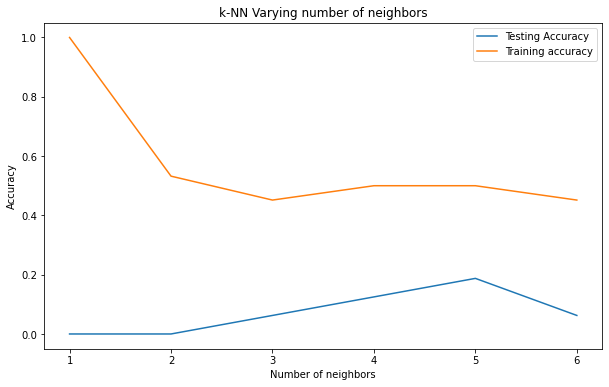

In [23]:
#Generate plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

#Text(0, 0.5, 'Accuracy')



knn

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', p=2, leaf_size=30) #Using Eucledian distance

In [25]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [26]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy * 100.0)

KNN Accuracy: 0.0


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [53]:
%%time
import xgboost as xgb
MLA = []
Z = [MLPClassifier(),RandomForestClassifier(), xgb.XGBClassifier(),KNeighborsClassifier() ]
Y = ["MLPClassifier","RandomForestClassifier" , "XGBClassifier", "knn"]



for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test) * 100.0)

c:\Users\Azka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Azka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 1.44 s
Wall time: 745 ms


In [54]:
d = { "Algorithm" : Y, "Accuracy" : MLA }

dfm = pd.DataFrame(d)
dfm

,Algorithm,Accuracy
0,MLPClassifier,37.50
1,RandomForestClassifier,18.75
2,XGBClassifier,37.50
3,knn,18.75


In [55]:
#Fit the model again, make predictions, calculate accuracy
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

model1 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000)
model1.fit(X_train, y_train)
# make predictions for test data
y_predict = model1.predict(X_test)
predictions3 = [round(value) for value in y_predict]
# evaluate predictions

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))
accuracyScore = accuracy_score(predictions3, y_test )
print("Accuracy score after train test split (XGB): ", accuracyScore * 100.0)





c:\Users\Azka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[0 0 2 0 1 0 0]
 [0 0 1 0 1 1 0]
 [1 0 1 0 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.25      0.33      0.29         3
           3       1.00      0.50      0.67         2
           4       0.33      1.00      0.50         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2

    accuracy                           0.44        16
   macro avg       0.44      0.55      0.45        16
weighted avg       0.37      0.44      0.37        16

Accuracy score after train tes

c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#Trying out SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
mlp = MLPClassifier()
from time import time
#Calculating fitting time
startTime = time()
mlp.fit(X_train, y_train)
print("Training time for MLPClassifier: ", round(time()-startTime, 3), " seconds")

#Making predictions and calculating the prediction time 
startTime = time()
y_predict1 = mlp.predict(X_test)
predictions4 =  [round(value) for value in y_predict1]
print("Prediction time for MLPClassifier: ", round(time()-startTime, 3), " seconds")
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions4))
print(classification_report(y_test, predictions4))
accuracyScore = accuracy_score(predictions4, y_test )
print("Accuracy score after train test split (MLP): ", accuracyScore * 100.0)



Training time for MLPClassifier:  0.331  seconds
Prediction time for MLPClassifier:  0.001  seconds
[[0 0 2 0 0 1 0]
 [0 0 2 0 0 1 0]
 [1 1 1 0 0 0 0]
 [0 0 1 0 0 1 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.20      1.00      0.33         1
           6       1.00      0.50      0.67         2

    accuracy                           0.31        16
   macro avg       0.34      0.40      0.32        16
weighted avg       0.29      0.31      0.27        16

Accuracy score after train test split (MLP):  31.25


c:\Users\Azka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

In [57]:
#Fitting the random forest classifier without any preprocessing
from sklearn.ensemble import RandomForestClassifier
from time import time

randomForest = RandomForestClassifier(n_estimators=200,random_state=0)

#Calculating the predicition time 
startTime = time()
randomForest.fit(X_train, y_train)
print("Fitting time for Random Forest (no preprocessing): ", round(time()-startTime, 3), "seconds")

Fitting time for Random Forest (no preprocessing):  0.292 seconds


In [58]:
#Making predictions with the model and calculating the accuracy score
from sklearn.metrics import accuracy_score

#Calculating the prediction time 
startTime = time()
predictions = randomForest.predict(X_test)
print("Prediction time for Random Forest (no preproccessing): ", round(time()-startTime, 3), " seconds")

Prediction time for Random Forest (no preproccessing):  0.029  seconds


In [59]:
#Evaluation metrics for Random Forest (no preprocessing)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#Names of the classes
classNames = ["boxer-getting-hit","explosion-gun","fighting-man-voice-of-pain","man-in-pain","meat-hit-sound","police-short-whistle"] 

#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(randomForest, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(randomForest, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

Cross-validation score: 
[0.23076923 0.15384615 0.5        0.25       0.5       ]
Confusion matrix: 
[[ 1  4  4  0  0  0  0]
 [ 0 12  1  0  0  0  0]
 [ 3  5  3  0  0  0  0]
 [ 0  2  2  0  1  2  0]
 [ 0  4  0  1  2  2  0]
 [ 0  7  0  0  0  1  0]
 [ 0  2  1  0  0  2  0]]
[[ 1  4  4  0  0  0  0]
 [ 0 12  1  0  0  0  0]
 [ 3  5  3  0  0  0  0]
 [ 0  2  2  0  1  2  0]
 [ 0  4  0  1  2  2  0]
 [ 0  7  0  0  0  1  0]
 [ 0  2  1  0  0  2  0]] ['boxer-getting-hit', 'explosion-gun', 'fighting-man-voice-of-pain', 'man-in-pain', 'meat-hit-sound', 'police-short-whistle']
Precision score: 
0.3064516129032258
Recall score: 
0.3064516129032258
F1 score: 
0.3064516129032258


In [60]:
#Calculate the log loss
from sklearn.metrics import log_loss
logLoss = log_loss(y_test, randomForest.predict_proba(X_test))
print("The log loss: ", logLoss)

#HUGE LOGLOSS
#Inference: The model slowly stops predicting; lack of training instances may be a problem

The log loss:  1.9460153664969577


In [61]:
#Fit the model again, make predictions, calculate accuracy
from sklearn.preprocessing import StandardScaler

#Calculate training time 
startTime = time()
randomForest.fit(X_train, y_train)
print("Training time for Random Forest: ", round(time()-startTime, 3), " seconds")

#Calculate prediction time 
startTime = time()
predictions = randomForest.predict(X_test)
print("Prediction time for Random Forest: ", round(time()-startTime, 3), " seconds")

#Accuracy score
accuracyScore = accuracy_score(predictions, y_test )
print("Accuracy score after train test split (Random Forest): ", accuracyScore * 100.0)


Training time for Random Forest:  0.36  seconds
Prediction time for Random Forest:  0.023  seconds
Accuracy score after train test split (Random Forest):  18.75


In [62]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10, shuffle = True)
rfc.fit(X_train, y_train)
#more functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids
#checking the accuracy of the model
print(rfc.score(X_test, y_test)*100.0)

25.0


In [63]:
#voting classifier

from sklearn import metrics
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('mlp', mlp), ('xgb', model1), ('randomfor', randomForest)], voting='soft')
hist=voting_clf.fit(X_train, y_train)
predss = voting_clf.predict(X_test)

preds = [round(value) for value in predss]
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
accuracyScore = accuracy_score(preds, y_test )
print("Accuracy score after train test split (Ensemble): ", accuracyScore * 100.0)

confusion_matrix=metrics.confusion_matrix(y_test,preds)
confusion_matrix


#from sklearn.metrics import plot_roc_curve

#metrics.plot_roc_curve(voting_clf, X_test, y_test)  # doctest: +SKIP
#plt.show() 



c:\Users\Azka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Azka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[0 0 2 0 1 0 0]
 [0 0 2 0 0 1 0]
 [1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.20      0.33      0.25         3
           3       1.00      0.50      0.67         2
           4       0.33      0.50      0.40         2
           5       0.20      1.00      0.33         1
           6       1.00      0.50      0.67         2

    accuracy                           0.31        16
   macro avg       0.39      0.40      0.33        16
weighted avg       0.34      0.31      0.28        16

Accuracy score after train tes

c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Azka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[0, 0, 2, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [64]:
from xgboost import XGBClassifier
clf2 = XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=3000,
                    n_jobs=-1, random_state=0, reg_alpha=0.2, 
                    colsample_bylevel=0.9, colsample_bytree=0.9)
clf2.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test)*100.0)
#more functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids

c:\Users\Azka\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
12.5


In [65]:


clf5 = svm.OneClassSVM(kernel='sigmoid',gamma='scale')
clf5.fit(X_train, y_train)
print(accuracy_score(clf5.predict(X_test), y_test)*100.0)
#more functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids

12.5


In [66]:
from sklearn.svm import OneClassSVM
model5 = svm.OneClassSVM(kernel='rbf',gamma=0.007)
model5.fit(X_train, y_train)



OneClassSVM(gamma=0.007)

In [67]:

pred5 = model5.predict(X_test)

accuracyScore123 = accuracy_score(pred5, y_test )
print("Accuracy score after train test split (ONESVM): ", accuracyScore123 * 100.0)


Accuracy score after train test split (ONESVM):  12.5


In [68]:
# Import Joblib Module from Scikit Learn

import joblib

In [69]:
# Import Required packages 
#-------------------------

# Import the Logistic Regression Module from Scikit Learn
from sklearn.linear_model import LogisticRegression  

# Import the IRIS Dataset to be used in this Kernel
from sklearn.datasets import load_iris  

# Load the Module to split the Dataset into Train & Test 
from sklearn.model_selection import train_test_split

In [70]:
# Load the data
Iris_data = load_iris() 

In [71]:
# Split data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Iris_data.data, 
                                                Iris_data.target, 
                                                test_size=0.3, 
                                                random_state=4)  

In [72]:
# Define the Model
LR_Model = LogisticRegression(C=0.1,  
                               max_iter=20, 
                               fit_intercept=True, 
                               n_jobs=3, 
                               solver='liblinear')

# Train the Model
LR_Model.fit(Xtrain, Ytrain)

c:\Users\Azka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=20, n_jobs=3, solver='liblinear')

In [73]:
# Save RL_Model to file in the current working directory

joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(LR_Model, joblib_file)

['joblib_RL_Model.pkl']

In [74]:
# Load from file

joblib_LR_model = joblib.load(joblib_file)


joblib_LR_model

LogisticRegression(C=0.1, max_iter=20, n_jobs=3, solver='liblinear')

In [75]:
# Use the Reloaded Joblib Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = joblib_LR_model.score(Xtest, Ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = joblib_LR_model.predict(Xtest)  

Ypredict

Test score: 91.11 %


array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])